In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Embedding,Bidirectional,Dense,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Model , load_model
import numpy
import pandas as pd

In [59]:
data = pd.read_excel('..\data\dataset4.xlsx')

In [60]:
data.head()

,Kelime,Etiket,Cumle
0,Corina,B-PERSON,0
1,Casanova,I-PERSON,0
2,bir,O,0
3,federal,O,0
4,parlementerdir,O,0


In [67]:
labels = list(data['Etiket'].unique())
labels_to_index = {t : i for i, t in enumerate(labels)}
index_to_labels = {i : t for i, t in enumerate(labels)}

In [68]:
index_to_labels

{0: 'B-PERSON',
 1: 'I-PERSON',
 2: 'O',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-DATE',
 8: 'I-DATE',
 9: 'I-TIME',
 10: 'B-TIME'}

In [5]:
words = list(data['Kelime'].unique())
words_to_index = {t : i for i, t in enumerate(words)}

In [6]:
data.Etiket = data.Etiket.apply(lambda label_str: labels_to_index[label_str])
data.Kelime = data.Kelime.apply(lambda word_str: words_to_index[word_str])

In [7]:
data_sentences = pd.DataFrame(columns=["sentence", "labels_index"])
for group_nu in range(len(data.Cumle.unique())):
    row_sentences = data.groupby("Cumle", group_keys = True).apply(lambda s:s).loc[group_nu]["Kelime"].values # sentences
    row_index_labels_sentences = data.groupby("Cumle", group_keys = True).apply(lambda s:s).loc[group_nu]["Etiket"].values # labels_sentences   
    data_sentences.loc[group_nu] = row_sentences, row_index_labels_sentences

In [ ]:
data_sentences.sentence

In [69]:
words_to_index["PAD"] = len(words_to_index)
labels_to_index["PAD"] = len(labels_to_index)
index_to_labels[len(labels_to_index)-1] = "PAD"

In [70]:
index_to_labels

{0: 'B-PERSON',
 1: 'I-PERSON',
 2: 'O',
 3: 'B-ORG',
 4: 'I-ORG',
 5: 'B-LOC',
 6: 'I-LOC',
 7: 'B-DATE',
 8: 'I-DATE',
 9: 'I-TIME',
 10: 'B-TIME',
 11: 'PAD'}

In [10]:
sentences = data_sentences.sentence.to_list()
tags = data_sentences.labels_index.to_list()

# Veri setini dolgu yapısıyla eşitleme
max_length = max(len(s) for s in sentences)
X = pad_sequences(sentences, maxlen=max_length, padding="post", value = words_to_index["PAD"])
y = pad_sequences(tags, maxlen=max_length, padding="post", value = labels_to_index["PAD"])

In [11]:
X_test=X[0:414]
X_train=X[414:]

In [13]:
y_test=y[0:414]
y_train=y[414:]

In [14]:
y_train

array([[ 0,  1,  2, ..., 11, 11, 11],
       [ 0,  1,  1, ..., 11, 11, 11],
       [ 2,  2,  2, ..., 11, 11, 11],
       ...,
       [ 7,  2,  2, ..., 11, 11, 11],
       [ 0,  7,  2, ..., 11, 11, 11],
       [ 3,  2,  2, ..., 11, 11, 11]])

In [48]:
vocab_size = len(words_to_index) + 1
num_tags = len(labels_to_index)
embedding_dim = 64
hidden_dim = 64


In [49]:
kelimeler_in = Input(shape=(None,), dtype='float64', name='words_input')
words = Embedding(vocab_size, embedding_dim)(kelimeler_in)
x = Bidirectional(GRU(hidden_dim, return_sequences=True))(words)
output=Dense(num_tags, activation = "softmax")(x)
model = Model(inputs=[kelimeler_in], outputs=[output])



model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



In [51]:
model.fit(X_train, y_train, epochs=10, batch_size=1)

Epoch 1/10
1655/1655 [==============================] - 41s 20ms/step - loss: 0.2550 - accuracy: 0.9342
Epoch 2/10
1655/1655 [==============================] - 32s 19ms/step - loss: 0.0865 - accuracy: 0.9741
Epoch 3/10
1655/1655 [==============================] - 31s 18ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 4/10
1655/1655 [==============================] - 31s 19ms/step - loss: 0.0140 - accuracy: 0.9955
Epoch 5/10
1655/1655 [==============================] - 31s 19ms/step - loss: 0.0078 - accuracy: 0.9975
Epoch 6/10
1655/1655 [==============================] - 31s 19ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 7/10
1655/1655 [==============================] - 31s 19ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 8/10
1655/1655 [==============================] - 34s 20ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 9/10
1655/1655 [==============================] - 32s 19ms/step - loss: 0.0019 - accuracy: 0.9994
Epoch 10/10
1655/1655 [==============================] - 32s 19m

In [18]:
# Örnek cümle için varlık tanım
test_sentence = ["5", "Ekim","Bülent", "Ecevit", "Üniversitesine", "gidilecek"]
#test_sentence = ["Mustafa", "Kemal","Atatürk", "19", "Mayıs", "1919'da","Samsun'a","çıktı"]

#test_sentence = ["Rusya", "devleti", "savaşta", "tarafsız", "kaldı","."]

test_input = pad_sequences([[words_to_index.get(word, 5) for word in test_sentence]], maxlen=max_length, padding="post", value = words_to_index["PAD"])   
test_input

array([[    5,  2268,     5,     5, 10358,     5, 11603, 11603, 11603,
        11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603,
        11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603,
        11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603,
        11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603,
        11603, 11603, 11603, 11603, 11603, 11603, 11603, 11603]])

In [54]:
model.save('../models/bigru_model.h5')

In [16]:
yuklenen_model=load_model('../models/bigru_model.h5')

In [19]:
predictions = yuklenen_model.predict(test_input)
predicted_tags = [list(labels_to_index)[idx] for idx in tf.argmax(predictions, axis=-1)[0]]

print(test_sentence)
print(predicted_tags[:len(test_sentence)])

1/1 [==============================] - 5s 5s/step
['5', 'Ekim', 'Bülent', 'Ecevit', 'Üniversitesine', 'gidilecek']
['O', 'B-DATE', 'O', 'O', 'O', 'O']


In [22]:
X_test=X_test.reshape(414,1,53)

In [ ]:
#metric =metrics.F1Score(threshold=0.5,num_classes=len(labels_to_index))
predictions=[]
for i in range(len(X_test)):
    y_pred = yuklenen_model.predict(X_test[i])
    y_pred=tf.argmax(y_pred, axis=-1)[0]
    predictions.append(y_pred)

In [26]:
for i in range (len(predictions)):
    predictions[i]=predictions[i].numpy()

In [27]:
preds=numpy.array(predictions)

In [82]:
labels.append('PAD')

In [83]:
labels

['B-PERSON',
 'I-PERSON',
 'O',
 'B-ORG',
 'I-ORG',
 'B-LOC',
 'I-LOC',
 'B-DATE',
 'I-DATE',
 'I-TIME',
 'B-TIME',
 'PAD']

In [87]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# Calculate F1 score
f1 = f1_score(y_test.reshape(21942,1), preds.reshape(21942,1),average=None)




In [91]:
for class_id, f1 in enumerate(f1):
    print(" {}: F1 score: {}".format(index_to_labels[class_id], f1))

 B-PERSON: F1 score: 0.2784810126582279
 I-PERSON: F1 score: 0.35102040816326535
 O: F1 score: 0.8913065582104728
 B-ORG: F1 score: 0.30065359477124187
 I-ORG: F1 score: 0.3510971786833856
 B-LOC: F1 score: 0.4846153846153846
 I-LOC: F1 score: 0.4615384615384615
 B-DATE: F1 score: 0.7159090909090909
 I-DATE: F1 score: 0.7491638795986622
 I-TIME: F1 score: 0.25
 B-TIME: F1 score: 0.3225806451612903
 PAD: F1 score: 1.0


In [85]:
print(classification_report(y_test.reshape(21942,1), preds.reshape(21942,1), target_names=labels))

              precision    recall  f1-score   support

    B-PERSON       0.65      0.18      0.28       248
    I-PERSON       0.51      0.27      0.35       161
           O       0.83      0.97      0.89      4540
       B-ORG       0.48      0.22      0.30       210
       I-ORG       0.59      0.25      0.35       224
       B-LOC       0.74      0.36      0.48       350
       I-LOC       0.54      0.40      0.46       127
      B-DATE       0.78      0.66      0.72       191
      I-DATE       0.85      0.67      0.75       167
      I-TIME       0.19      0.38      0.25        13
      B-TIME       0.25      0.45      0.32        11
         PAD       1.00      1.00      1.00     15700

    accuracy                           0.94     21942
   macro avg       0.62      0.48      0.51     21942
weighted avg       0.94      0.94      0.93     21942



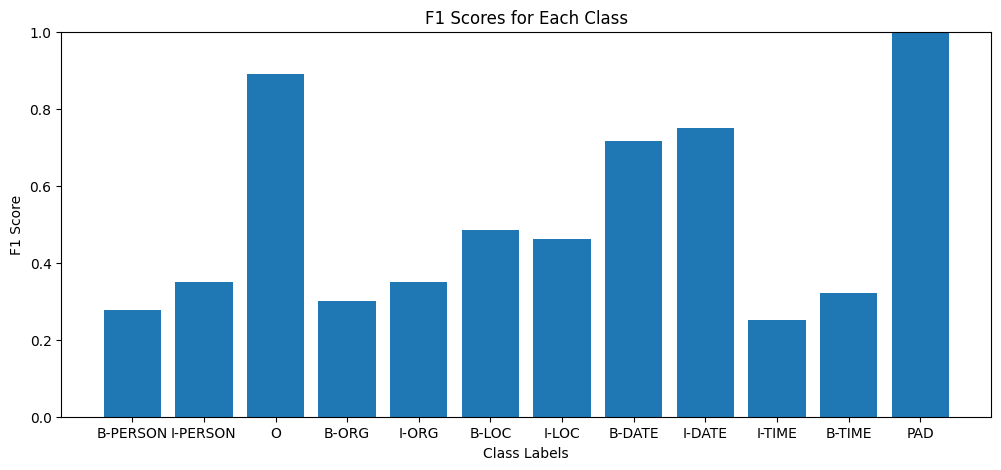

In [98]:
import matplotlib.pyplot as plt

f1 = f1_score(y_test.reshape(21942,1), preds.reshape(21942,1),average=None)

plt.figure(figsize=(12, 5))
plt.bar(labels, f1.tolist())
plt.xlabel('Class Labels')
plt.ylabel('F1 Score')
plt.title('F1 Scores for Each Class')
plt.xticks(labels)
plt.ylim(0, 1)  # Optional: Set the y-axis limits
plt.show()

In [7]:
from keras.models import load_model
model=load_model('../models/bigru_model.h5')

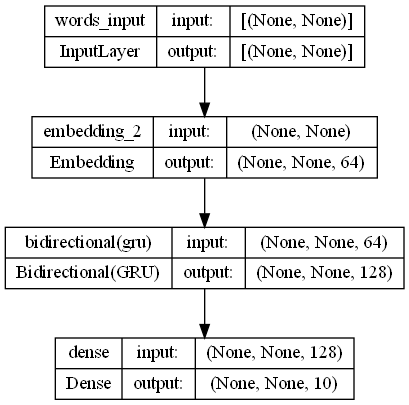

In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)